In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | wailuku
Processing Record 7 of Set 1 | evensk
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 12 of Set 1 | boyolangu
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | blytheville
Processing Record 15 of Set 1 | matara
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | jiddah
City not found. Skipping...
Processing Record 19 of Set 1 | saint george
Processing Record 20 of Set 1 | bolungarvik
City not found. Skipping...
Processing

Processing Record 34 of Set 4 | pangnirtung
Processing Record 35 of Set 4 | high level
Processing Record 36 of Set 4 | muros
Processing Record 37 of Set 4 | bedele
Processing Record 38 of Set 4 | kupang
Processing Record 39 of Set 4 | synya
Processing Record 40 of Set 4 | jiangyou
Processing Record 41 of Set 4 | drakhtik
Processing Record 42 of Set 4 | atka
City not found. Skipping...
Processing Record 43 of Set 4 | wakkanai
Processing Record 44 of Set 4 | dikson
Processing Record 45 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 46 of Set 4 | portland
Processing Record 47 of Set 4 | saleaula
City not found. Skipping...
Processing Record 48 of Set 4 | kuala terengganu
Processing Record 49 of Set 4 | mount isa
Processing Record 50 of Set 4 | horta
Processing Record 1 of Set 5 | souillac
Processing Record 2 of Set 5 | catamarca
Processing Record 3 of Set 5 | berlevag
Processing Record 4 of Set 5 | shitanjing
Processing Record 5 of Set 5 | dawei
Processing Record 6 o

Processing Record 24 of Set 8 | gashua
Processing Record 25 of Set 8 | kruisfontein
Processing Record 26 of Set 8 | waingapu
Processing Record 27 of Set 8 | bastrop
Processing Record 28 of Set 8 | sandwick
Processing Record 29 of Set 8 | el angel
Processing Record 30 of Set 8 | canala
Processing Record 31 of Set 8 | bandarbeyla
Processing Record 32 of Set 8 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 33 of Set 8 | houlton
Processing Record 34 of Set 8 | codrington
Processing Record 35 of Set 8 | caravelas
Processing Record 36 of Set 8 | cherepovets
Processing Record 37 of Set 8 | cabedelo
Processing Record 38 of Set 8 | seydi
Processing Record 39 of Set 8 | salvador
Processing Record 40 of Set 8 | scarborough
Processing Record 41 of Set 8 | namatanai
Processing Record 42 of Set 8 | serenje
Processing Record 43 of Set 8 | fatehpur
Processing Record 44 of Set 8 | ossora
Processing Record 45 of Set 8 | nouadhibou
Processing Record 46 of Set 8 | wyszkow
Processing 

Processing Record 12 of Set 12 | constitucion
Processing Record 13 of Set 12 | varhaug
Processing Record 14 of Set 12 | tessalit
Processing Record 15 of Set 12 | yasothon
Processing Record 16 of Set 12 | skoghall
Processing Record 17 of Set 12 | myrtle beach
Processing Record 18 of Set 12 | havelock
Processing Record 19 of Set 12 | bintulu
Processing Record 20 of Set 12 | gulu
Processing Record 21 of Set 12 | hokitika
Processing Record 22 of Set 12 | verkhoyansk
Processing Record 23 of Set 12 | marsabit
Processing Record 24 of Set 12 | igrim
Processing Record 25 of Set 12 | hue
Processing Record 26 of Set 12 | sibu
Processing Record 27 of Set 12 | aguada de pasajeros
Processing Record 28 of Set 12 | puerto guzman
Processing Record 29 of Set 12 | riesa
Processing Record 30 of Set 12 | karaul
City not found. Skipping...
Processing Record 31 of Set 12 | palma di montechiaro
Processing Record 32 of Set 12 | summerville
Processing Record 33 of Set 12 | nantucket
Processing Record 34 of Set 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,50.11,71,40,16.11,CL,2022-05-14 17:58:43
1,Qaanaaq,77.4840,-69.3632,20.25,68,52,1.57,GL,2022-05-14 18:03:31
2,Hilo,19.7297,-155.0900,77.29,85,70,1.01,US,2022-05-14 18:01:39
3,Rikitea,-23.1203,-134.9692,76.30,68,0,23.47,PF,2022-05-14 18:02:30
4,Iqaluit,63.7506,-68.5145,20.70,79,63,20.00,CA,2022-05-14 18:03:32
5,Wailuku,20.8911,-156.5047,75.96,81,31,10.00,US,2022-05-14 18:03:32
6,Evensk,61.9500,159.2333,33.39,98,100,2.55,RU,2022-05-14 18:03:33
7,Lebu,-37.6167,-73.6500,55.09,69,92,18.95,CL,2022-05-14 18:03:33
8,Kapaa,22.0752,-159.3190,76.12,87,79,4.00,US,2022-05-14 18:03:34
9,Boyolangu,-8.1181,111.8935,76.59,91,99,1.25,ID,2022-05-14 18:03:35


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-05-14 17:58:43,-53.1500,-70.9167,50.11,71,40,16.11
1,Qaanaaq,GL,2022-05-14 18:03:31,77.4840,-69.3632,20.25,68,52,1.57
2,Hilo,US,2022-05-14 18:01:39,19.7297,-155.0900,77.29,85,70,1.01
3,Rikitea,PF,2022-05-14 18:02:30,-23.1203,-134.9692,76.30,68,0,23.47
4,Iqaluit,CA,2022-05-14 18:03:32,63.7506,-68.5145,20.70,79,63,20.00
5,Wailuku,US,2022-05-14 18:03:32,20.8911,-156.5047,75.96,81,31,10.00
6,Evensk,RU,2022-05-14 18:03:33,61.9500,159.2333,33.39,98,100,2.55
7,Lebu,CL,2022-05-14 18:03:33,-37.6167,-73.6500,55.09,69,92,18.95
8,Kapaa,US,2022-05-14 18:03:34,22.0752,-159.3190,76.12,87,79,4.00
9,Boyolangu,ID,2022-05-14 18:03:35,-8.1181,111.8935,76.59,91,99,1.25


In [13]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Get today's date in seconds.
today = time.time()
today

1652552801.3004947

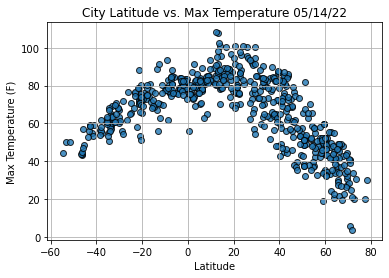

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

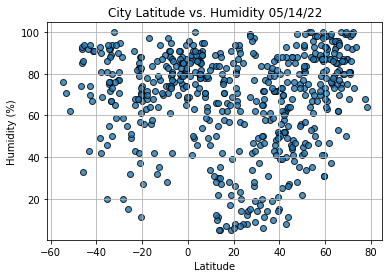

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

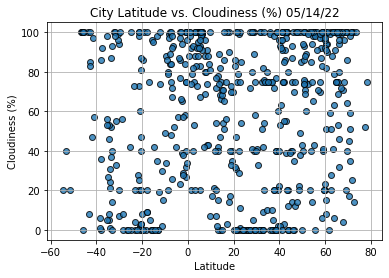

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

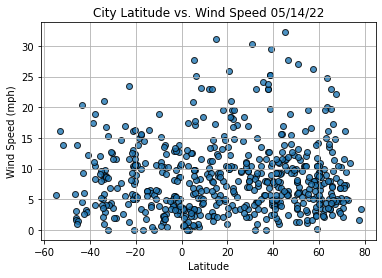

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [60]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.subplots(figsize=(10,6))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [29]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

LinregressResult(slope=-0.7916022283321775, intercept=94.76264285442775, rvalue=-0.8062912784649536, pvalue=1.7880822906091834e-93, stderr=0.02900089090014629, intercept_stderr=1.251671900624561)

In [31]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

LinregressResult(slope=0.6634922587736795, intercept=83.56252523023913, rvalue=0.8428235840043731, pvalue=2.952015423759811e-46, stderr=0.03298319937969426, intercept_stderr=0.8291217885035395)

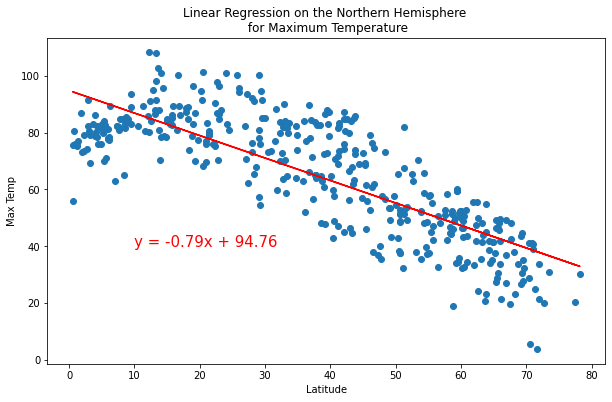

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

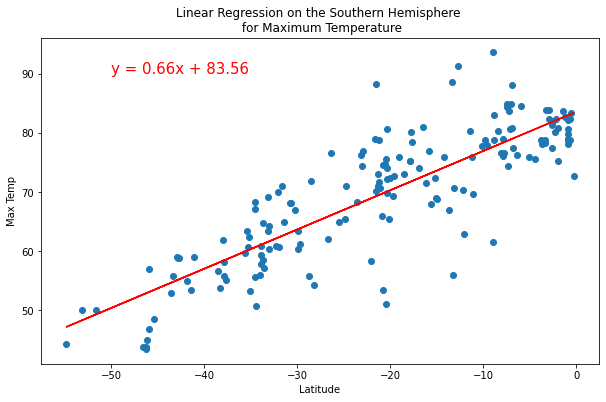

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

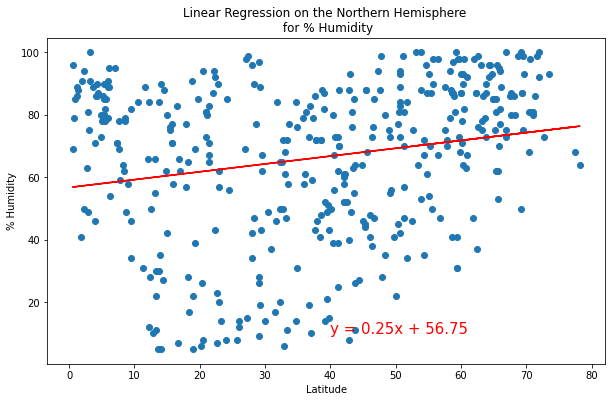

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

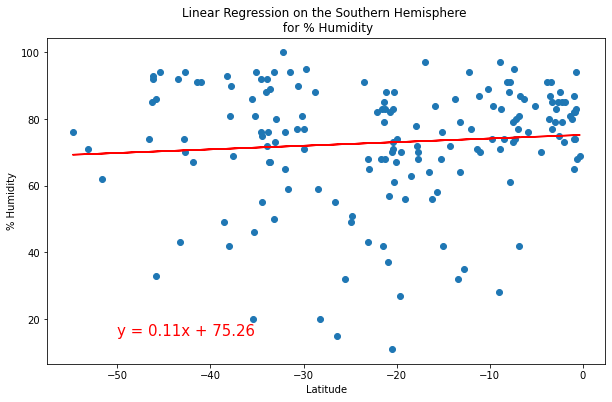

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

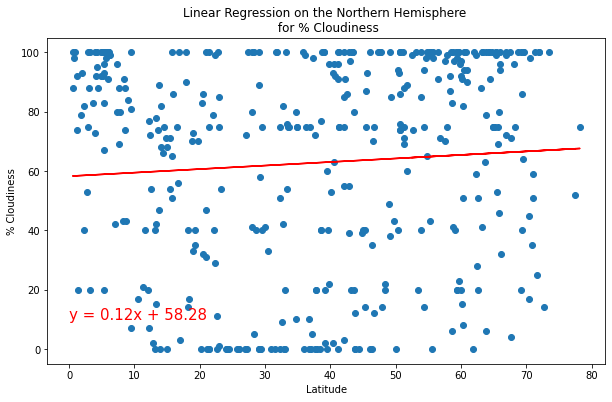

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(0,10))

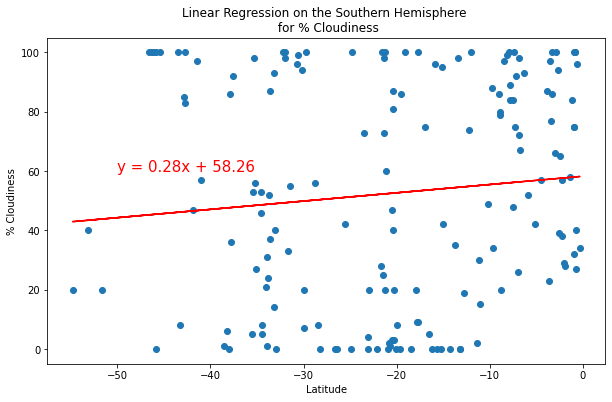

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

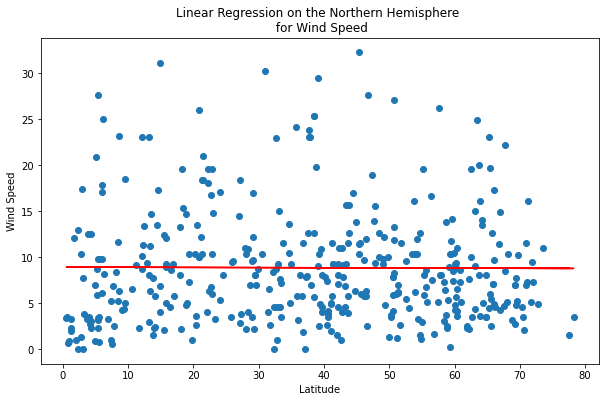

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

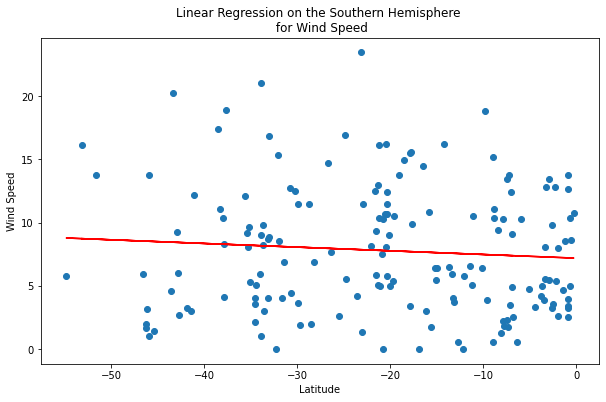

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))